code to download packages

In [2]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

batch size

In [0]:
bs = 64

In [0]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.FLOWERS); path

PosixPath('/content/data/oxford-102-flowers')

In [0]:
path.ls()

[PosixPath('/content/data/oxford-102-flowers/test.txt'),
 PosixPath('/content/data/oxford-102-flowers/jpg'),
 PosixPath('/content/data/oxford-102-flowers/train.txt'),
 PosixPath('/content/data/oxford-102-flowers/valid.txt')]

In [0]:
# set paths

#path_anno = path/'annotations'
path_img = path/'jpg'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/data/oxford-102-flowers/jpg/image_07971.jpg'),
 PosixPath('/content/data/oxford-102-flowers/jpg/image_00920.jpg'),
 PosixPath('/content/data/oxford-102-flowers/jpg/image_01138.jpg'),
 PosixPath('/content/data/oxford-102-flowers/jpg/image_07714.jpg'),
 PosixPath('/content/data/oxford-102-flowers/jpg/image_02016.jpg')]

In [0]:
images_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz'
pathNew = untar_data(images_url); pathNew

PosixPath('/content/data/102flowers.tgz')

In [0]:
labels_url = 'http://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat'
labels_path = Path('/content/data/102flowers.mat')
download_url(labels_url, labels_path); labels_path


PosixPath('/content/data/102flowers.mat')

In [0]:
mat = loadmat(labels_path.as_posix()); mat['labels']
labels = [str(l) for l in mat['labels'][0]]; labels[:5]

['77', '77', '77', '77', '77']

In [0]:
path_img = path/'jpg'
fnames = get_image_files(path_img)
fnames = sorted(fnames)

Get labels

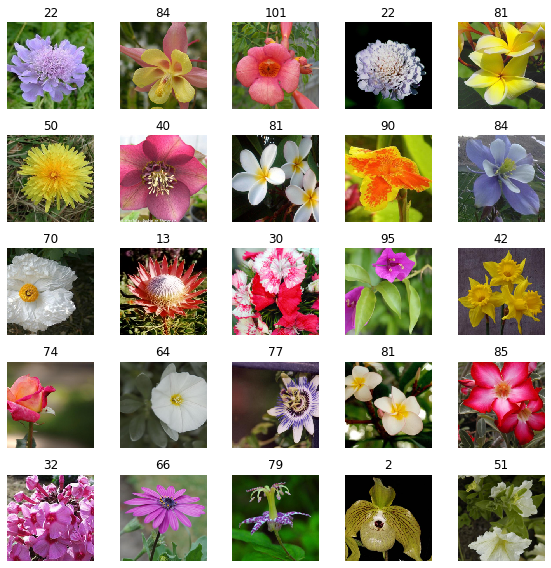

In [0]:

np.random.seed(2)

data = ImageDataBunch.from_lists(path, sorted(fnames), labels, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

data.show_batch(rows=5, figsize=(8,8))

In [0]:
print(data.classes)
len(data.classes),data.c

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


(102, 102)

**TRAINING RESNET**

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.691377,0.598762,0.149664,03:41
1,0.890534,0.323605,0.086133,03:32
2,0.459977,0.259612,0.062309,03:34
3,0.284524,0.242737,0.059255,03:33


In [1]:
learn.save('stage-1-50')

NameError: ignored

**RESULTS**

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

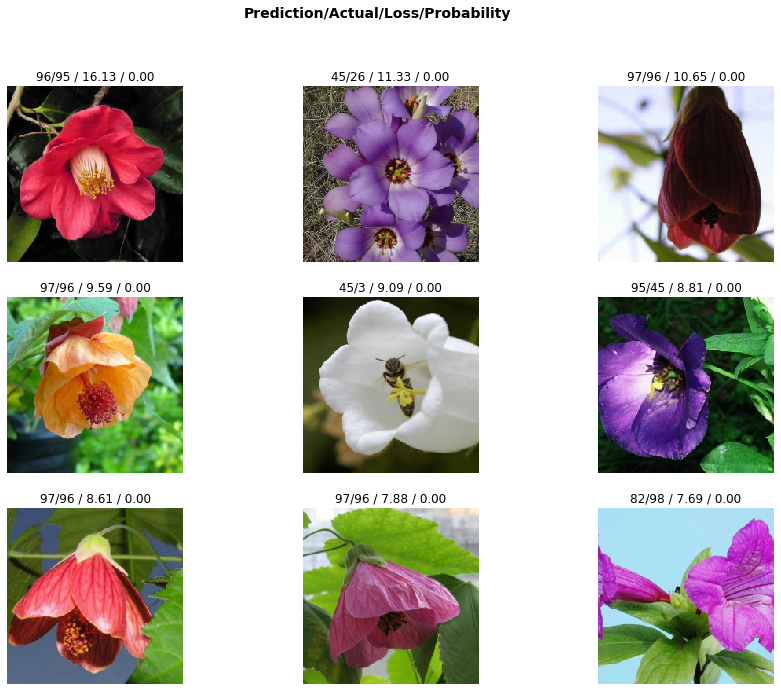

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

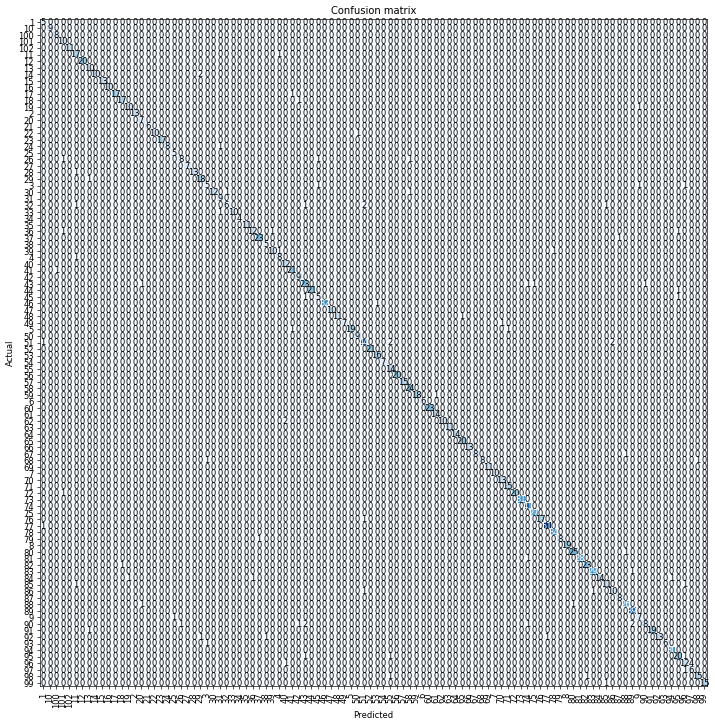

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
interp.most_confused(min_val=2)

[('96', '97', 4),
 ('14', '29', 2),
 ('32', '51', 2),
 ('51', '55', 2),
 ('51', '86', 2),
 ('62', '40', 2),
 ('90', '43', 2),
 ('90', '89', 2)]

**Unfreezing, fine-tuning and learning rates**

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.527209,0.240659,0.061087,03:37


In [0]:
learn.load('stage-1');

**Training with RESNET50**

using the same data as before

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


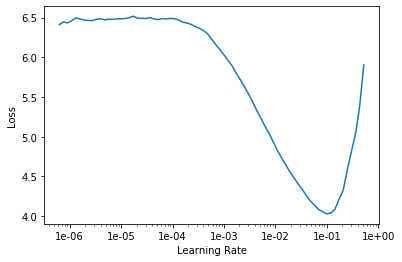

In [0]:
learn.lr_find()
learn.recorder.plot()